# Exploratory Data Analysis and Model Building - Bank Marketing Campaign
Data Description

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

Kaggle URL to Download Dataset: https://www.kaggle.com/janiobachmann/bank-marketing-dataset

What is a Term Deposit?

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia: https://www.investopedia.com/terms/t/termdeposit.asp

Importing librarirs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [5]:
# check the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# Find Number of rows and column
df.shape

(11162, 17)

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [8]:
# Describes the  numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
df.groupby('deposit')['deposit'].agg('count')

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

#### Data Description

- This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

#### Feature

 

- age | int64 | age in years
- job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])
- marital | object | marital status (categorical: ['married' 'single' 'divorced'])
- education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])
- default | Object | has credit in default? (categorical: ['no' 'yes'])
- balance | int64 | Balance of the individual
- housing | object | has housing loan? (categorical: ['yes' 'no'])
- loan | object | has personal loan? (categorical: ['no' 'yes'])
- contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])
- day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])
- duration | int64 | last contact duration, in seconds (numeric)
- campaign | int64 | number of contacts performed during this campaign and for this client
- pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous | int64 | number of contacts performed before this campaign and for this client
- poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])

#### Label

- deposit | object | has the client subscribed a term deposit? (binary: 'yes','no')

# Exploratory Data Analysis

### 1. Find Unwanted Columns

In [10]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


There is no unwanted Data columns

### 2. Find Missing Values

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There is no Missing Values found

#### 3. Find Features with One Value

In [12]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

###### No feature with only one value

#### 4. Explore the Categorical Features

In [13]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

There are 9 categorical features.
Feature job and month has highest number of categorical values

#### 5. Find Categorical Feature Distribution

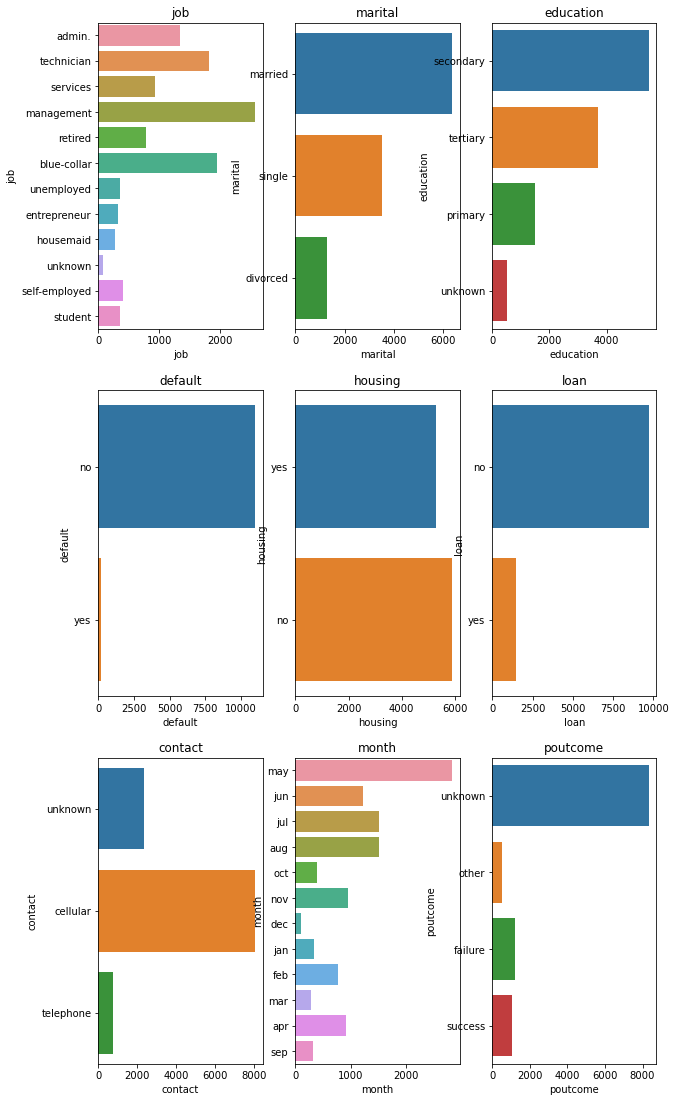

In [14]:
#check count based on categorical features
plt.figure(figsize=(10,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

# 
- Client with job type as management records are high in given dataset and housemaid are very less.
- Client who married are high in records in given dataset and divorced are less
- Client whoes education background is secondary are in high numbers in given dataset
- Defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
- Data in month of may is high and less in dec

#### 6. Relationship between Categorical Features and Label

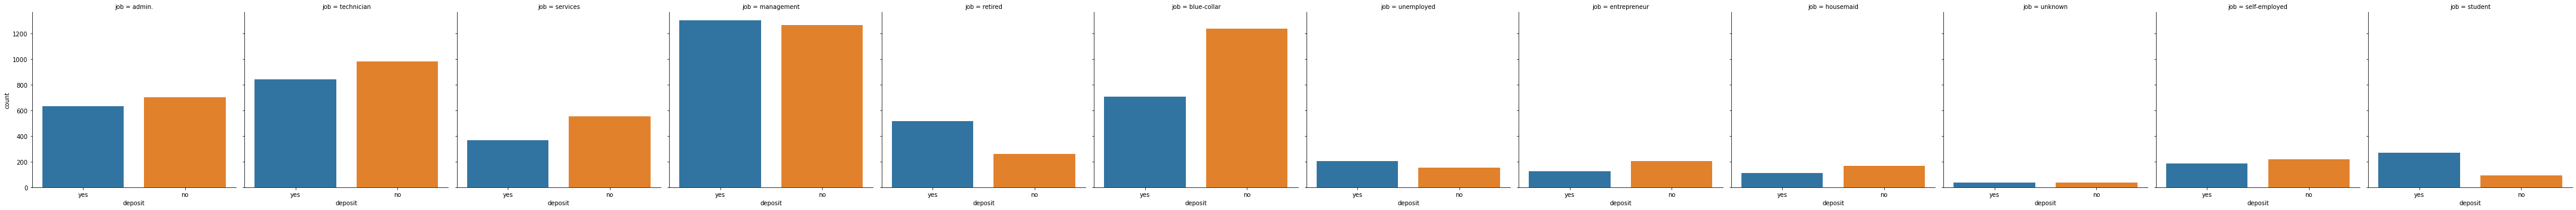

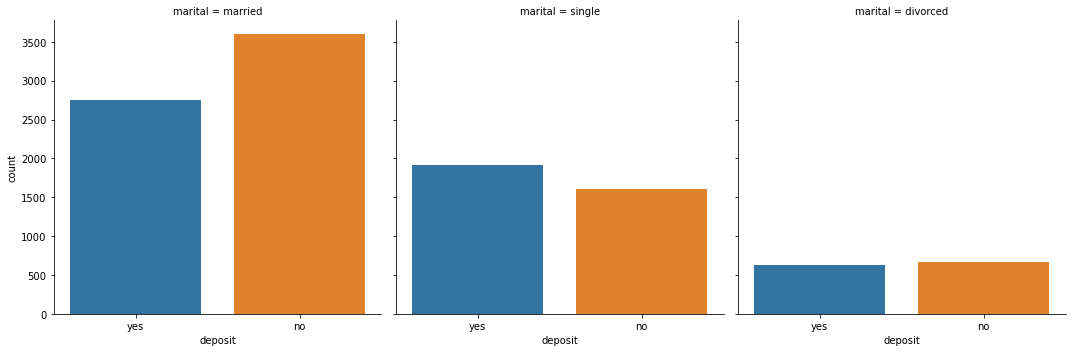

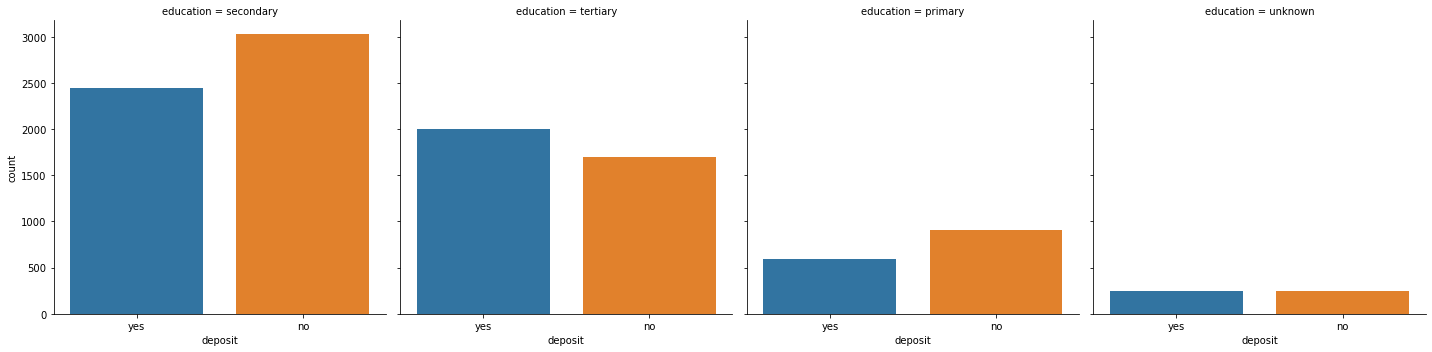

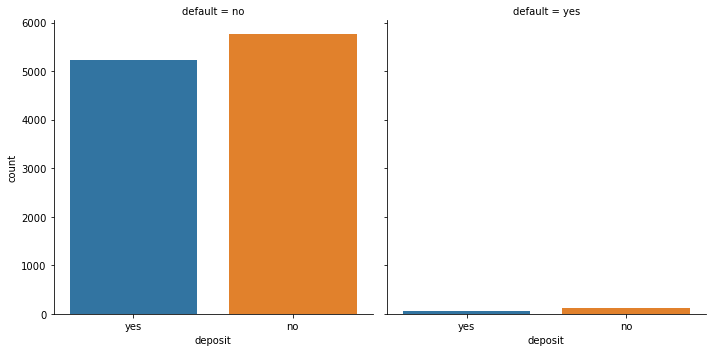

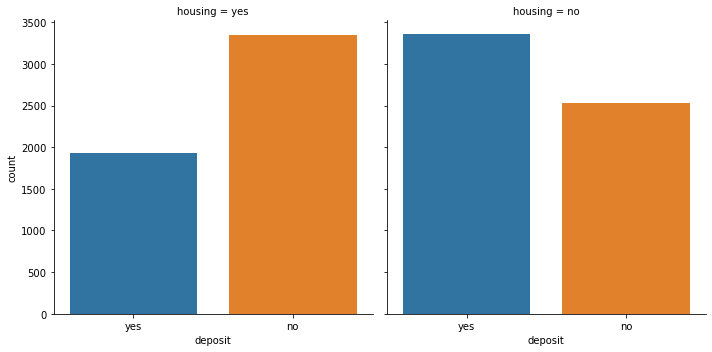

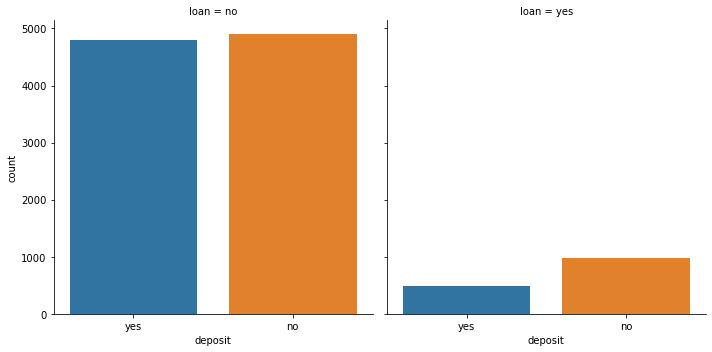

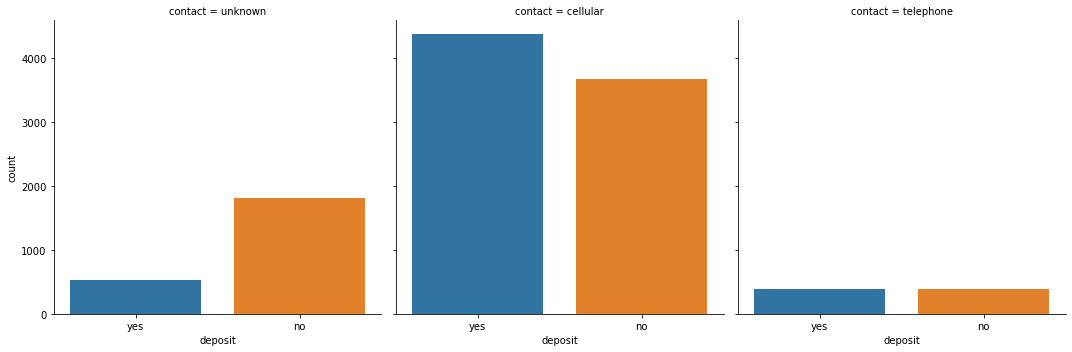

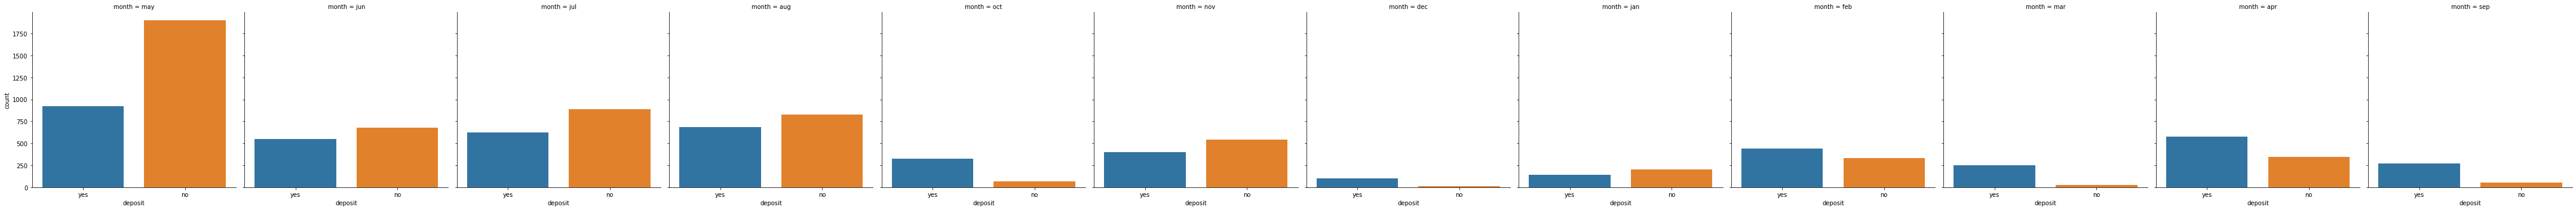

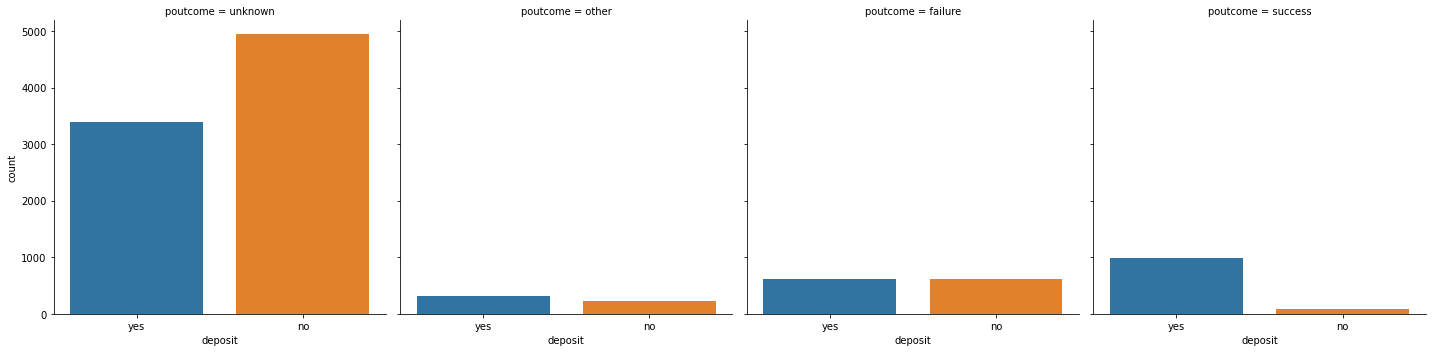

In [15]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= df)
plt.show()

In [16]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

- retired client has high interest on deposit
- client who has housing loan seems to be not interested much on deposit
- if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit
- in month of March, September, October and December, client show high interest to deposit
- in month of may, records are high but client interst ratio is very less

#### 7. Explore the Numerical Features

In [17]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


- There are 7 numerical features

#### 8. Find Discrete Numerical Features

In [18]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


#### 9. Find Continous Numerical Features

In [19]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


#### 10. Distribution of Continous Numerical Features

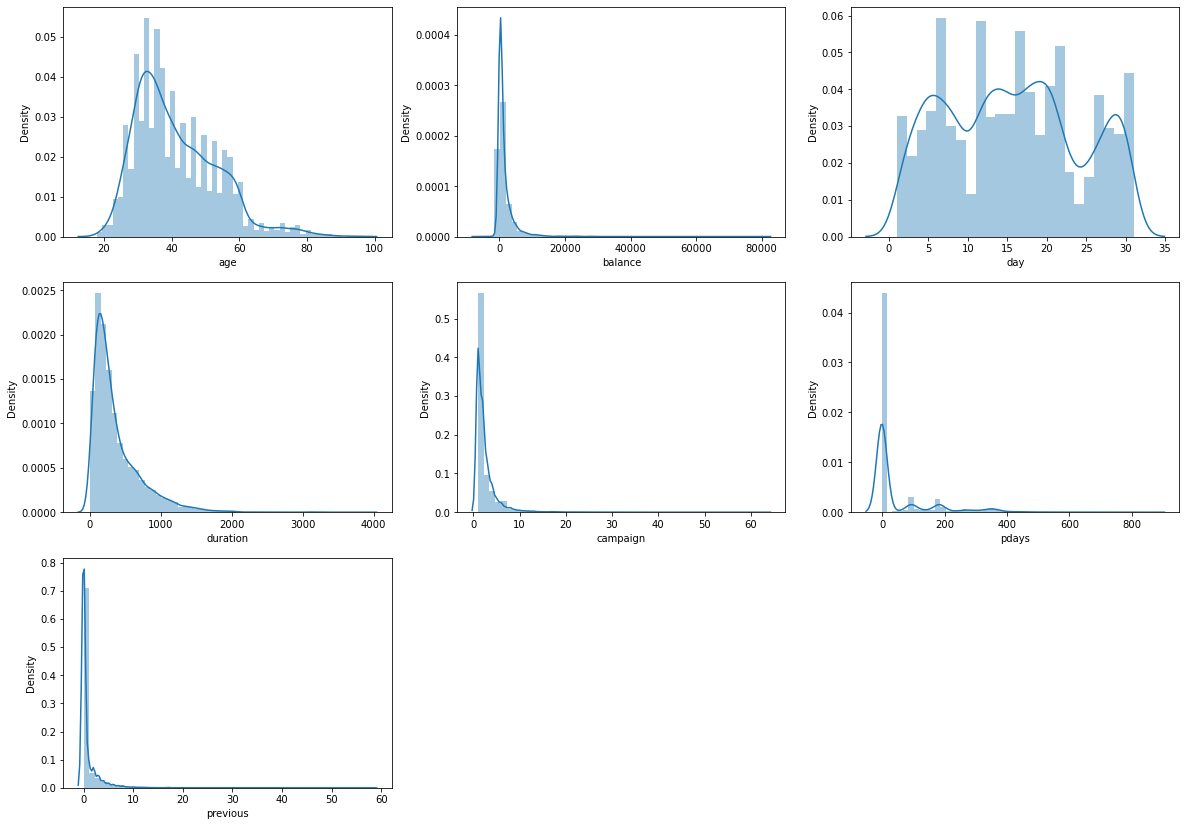

In [20]:
#plot a univariate distribution of continous observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

It seems age, days distributed normally.
Balance, duration, compaign, pdays and previous heavily skewed towards left and seems to be have some outliers

#### 11. Relation between Continous numerical Features and Labels

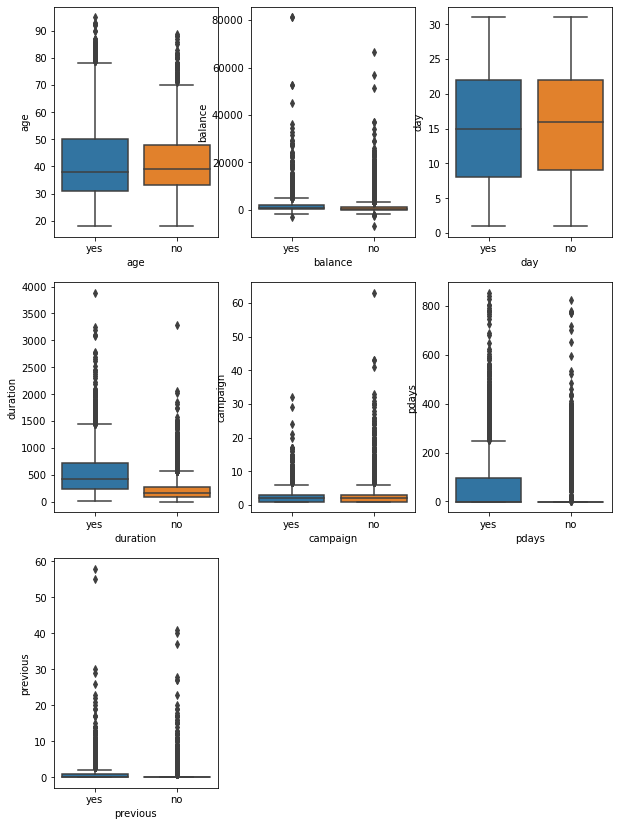

In [21]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(10,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()



client shows interest on deposit who had discussion for longer duration


#### 12. Find Outliers in numerical features

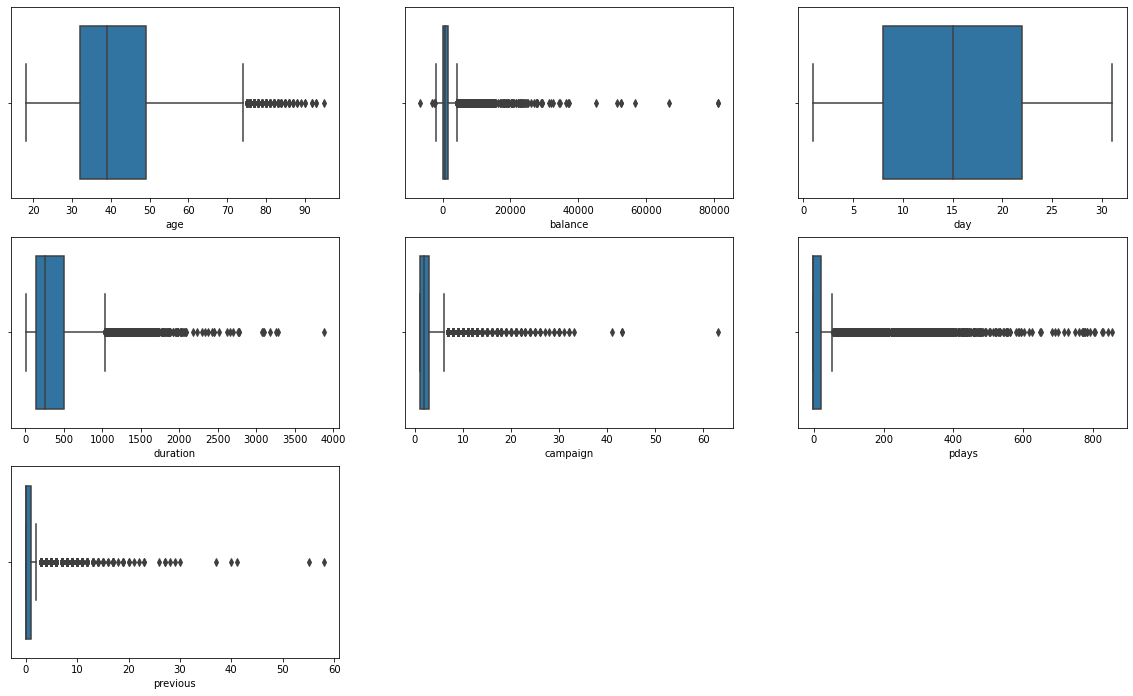

In [22]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

###### age, balance, duration, compaign, pdays and previous have some outliers.

#### 13.Check the Data set is balanced or not based on target values in classification

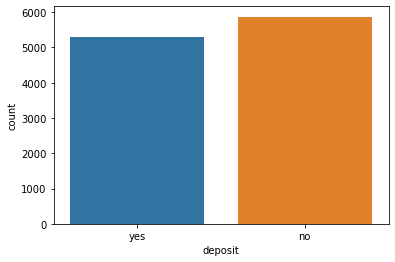

In [23]:

sns.countplot(x='deposit',data=df)
plt.show()

In [24]:
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

###### Given dataset seems to be balanced

### 14. Explore the Correlation between numerical features

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

<Figure size 864x576 with 0 Axes>

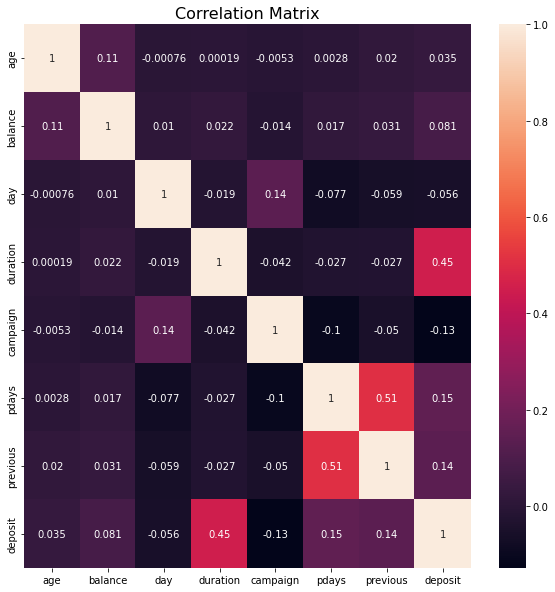

In [26]:
numeric_df = df.select_dtypes(exclude="object")
corr_numeric = numeric_df.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_numeric, cbar=True,annot=True)

plt.title("Correlation Matrix", fontsize=16)
plt.show()

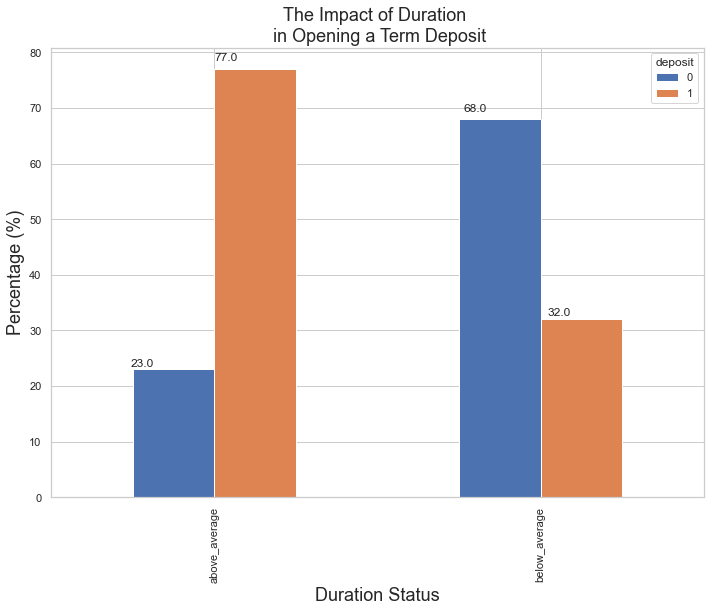

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()


lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False)
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

##### Campaign Duration: we see that duration has a high correlation with term deposits meaning the higher the duration, the more likely it is for a client to open a term deposit.
Average Campaign Duration: The average campaign duration is 371.99, let's see if clients that were above this average were more likely to open a term deposit.
Duration Status: People who were above the duration status, were more likely to open a term deposit. 77% of the group that is above average in duration opened term deposits while those that were below average 32% opened term deposit accounts. This tells us that it will be a good idea to target individuals who are in the above average category.

## Feature Engineering

###### As per Exploratory Data Analysis ,

No missing value found.
No feature found with one value.
9 categorical features.
Defaut features does not play imp role.
It seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [28]:
df1= df.copy()

In [29]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,duration_status
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,above_average
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,above_average
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,above_average
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,above_average
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,above_average


In [30]:
df1.shape

(11162, 18)

In [31]:
df1['duration']

0        1042
1        1467
2        1389
3         579
4         673
         ... 
11157     257
11158      83
11159     156
11160       9
11161     628
Name: duration, Length: 11162, dtype: int64

In [32]:
#default features does not play imp role
df1.groupby(['deposit','default']).size()

deposit  default
0        no         5757
         yes         116
1        no         5237
         yes          52
dtype: int64

In [33]:
df1.drop(['default'],axis=1, inplace=True)

In [34]:
df1.groupby(['deposit','pdays']).size()

deposit  pdays
0        -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
1         804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [35]:
#we can see negative values,so we can drop pdays as well

In [36]:
df1.drop(['pdays'],axis=1, inplace=True)

In [37]:
# remove outliers in feature age...
df1.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [38]:
# remove outliers in feature balance...
df1.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest

deposit  balance
0        -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
1         34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [39]:
# remove outliers in feature duration...
df1.groupby(['deposit','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interes

deposit  duration
0        2           1
         3           1
         4           2
         5           4
         6           6
                    ..
1        3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [40]:
# remove outliers in feature campaign...
df1.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
0        1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
1        1           2561
         2          

In [41]:
df2 = df1[df1['campaign'] < 33]


In [42]:
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
0        1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
1        1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [43]:
# remove outliers in feature previous...
df2.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
0        0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
1        0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [44]:
df3 = df2[df2['previous'] < 31]


In [45]:
df4 = df3.assign(duration=df['duration'])

In [46]:
df4.drop(['duration_status'],axis=1, inplace=True)

In [47]:
df4.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,1


In [48]:
df4['deposit'].value_counts()

0    5865
1    5287
Name: deposit, dtype: int64

#### Feature  Encoding

In [49]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [50]:
bool_columns = ['housing', 'loan']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)

    df4.drop(col, axis=1, inplace=True)

In [51]:
df4.head()

,age,balance,day,duration,campaign,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,59,2343,5,1042,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,56,45,5,1467,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,41,1270,5,1389,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,55,2476,5,579,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,54,184,5,673,2,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [52]:
df4['deposit'].value_counts()

0    5865
1    5287
Name: deposit, dtype: int64

### Split dataset into Training set and Test data set

In [53]:
X = df4.drop(['deposit'],axis=1)
y = df4['deposit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [54]:
len(X_train)

8921

In [55]:
len(X_test)

2231

In [56]:
X_train

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
8720,46,624,16,201,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3812,43,2952,3,417,2,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3525,34,920,14,526,3,3,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5379,38,178,20,245,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
6574,27,35,4,255,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4861,19,779,1,184,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3265,60,106,24,137,1,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9854,47,107,15,246,1,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
10809,53,-165,9,89,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [57]:
X_test

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
7351,56,1561,13,75,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9132,53,136,15,99,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
9221,30,-218,27,13,15,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4548,72,763,24,384,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10563,38,0,16,284,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,55,274,9,7,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11101,54,6242,7,162,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
5294,32,3696,21,315,3,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
10077,43,5172,29,57,3,0,0,0,0,1,...,0,1,0,0,0,0,0,1,1,0


## Model Selection

In [58]:
# will try to use below two models that are Logistic Regression ,RandomForestClassifier and svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [59]:
lr= LogisticRegression( fit_intercept=False, max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8260869565217391

In [60]:
lr.predict_proba(X_test)

array([[0.84504125, 0.15495875],
       [0.98296694, 0.01703306],
       [0.97053394, 0.02946606],
       ...,
       [0.82421481, 0.17578519],
       [0.98410897, 0.01589103],
       [0.00416741, 0.99583259]])

In [61]:
weight=pd.Series(lr.coef_[0],index= X.columns.values)
print(weight)

age                   -0.005951
balance                0.000028
day                    0.001397
duration               0.005628
campaign              -0.077420
previous              -0.058099
job_blue-collar       -0.419779
job_entrepreneur      -0.217200
job_housemaid         -0.214133
job_management        -0.162995
job_retired            0.529243
job_self-employed     -0.185145
job_services          -0.272318
job_student            0.429989
job_technician        -0.217003
job_unemployed        -0.002323
job_unknown           -0.007086
marital_married       -0.173892
marital_single         0.071551
education_secondary    0.236269
education_tertiary     0.408323
education_unknown      0.080399
contact_telephone      0.111164
contact_unknown       -1.583356
month_aug             -0.885957
month_dec              0.339485
month_feb             -0.098444
month_jan             -0.691982
month_jul             -1.122143
month_jun              0.281175
month_mar              1.217601
month_ma

In [62]:
model_LR=lr

In [63]:
y_predicted = model1.predict(X_test)

NameError: name 'model1' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model_KNN.fit(X_train,y_train)

#Predict Output
predicted= model_KNN.predict(X_test) 



In [ ]:
model_KNN.score(X_test,y_test)

In [ ]:
model_RF= RandomForestClassifier(n_estimators=10)
model_RF.fit(X_train,y_train)

In [ ]:
model_RF.score(X_test,y_test)

In [ ]:
y_predicted = model_RF.predict(X_test)

In [64]:
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
model_NB.score(X_test,y_test)


0.7355445988346033

In [65]:
model_SV = SVC(C = 1,gamma = 10,kernel ='rbf')


In [66]:
model_SV.fit(X_train, y_train)

SVC(C=1, gamma=10)

In [67]:
y_pred1= model_SV.predict(X_test)

In [68]:
model_SV.score(X_test,y_test)

0.5284625728372927

In [69]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)



DecisionTreeClassifier()

In [70]:
model_DT.score(X_test,y_test)

0.7920215150156881

In [71]:
CLF = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Rand F', 'Naives Bayes'], 
    ' Scores': [model_LR.score(X_test,y_test), model_SV.score(X_test,y_test), model_KNN.score(X_test,y_test), model_DT.score(X_test,y_test),  model_RF.score(X_test,y_test),  model_NB.score(X_test,y_test)]}

NameError: name 'model_KNN' is not defined

In [ ]:
result_clf = pd.DataFrame(data=CLF)

result_clf

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])

print('KNN Classifier AUC_Score: ',roc_auc_score(y_test, model_KNN.predict_proba(X_test)[:,1]) ))
print('Random Forest Classifier AUC_Score: ', roc_auc_score(y_test, model_RF.predict_proba(X_test)[:,1]))
print('Naives Bayes Classifier AUC_Score: ',roc_auc_score(y_test, model_NB.predict_proba(X_test)[:,1]))
print('LogisticRegression AUC_Score: ',roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1]))
print('DecisionTreeClassifier AUC_Score: ', roc_auc_score(y_test, model_DT.predict_proba(X_test)[:,1]))
print('SV Classifier AUC_Score: ', roc_auc_score(y_test, model_SV.predict_proba(X_test)[:,1]))

####  crossvalidation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
SV_score =cross_val_score(model_SV,X=X_train, y=y_train, cv=5)
print(SV_score)
svc_mean=SV_score.mean()
#roc_auc_score(y_test, model_SV.predict_proba(X_test)[:,1])

In [ ]:
rand_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(rand_score)
rand_mean=rand_score.mean()

roc_auc_score(y_test, model_RF.predict_proba(X_test)[:,1])


In [ ]:
Log_reg_score =cross_val_score(estimator=LogisticRegression(),X=X_train, y=y_train, cv=5)
print(Log_reg_score)
log_reg_mean=Log_reg_score.mean()
roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1])

In [ ]:
Knn_score =cross_val_score(estimator=KNeighborsClassifier(),X=X_train, y=y_train, cv=5)
print(Knn_score)
knn_mean=Knn_score.mean()
roc_auc_score(y_test, model_KNN.predict_proba(X_test)[:,1])

In [ ]:
model_score =cross_val_score(estimator=GaussianNB(),X=X_train, y=y_train, cv=5)
print(model_score)
nav_mean=model_score.mean()
roc_auc_score(y_test, model_NB.predict_proba(X_test)[:,1])

In [ ]:
tree_score =cross_val_score(estimator=DecisionTreeClassifier(),X=X_train, y=y_train, cv=5)
print(tree_score)
tree_mean=tree_score.mean()
roc_auc_score(y_test, model_DT.predict_proba(X_test)[:,1])

In [ ]:
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Rand F', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean,  rand_mean,  nav_mean]}

In [ ]:
result_df = pd.DataFrame(data=d)
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

In [ ]:
from sklearn.metrics import roc_auc_score


print('KNN Classifier AUC_Score: ',roc_auc_score(y_test, model_KNN.predict_proba(X_test)[:,1]) )
print('Random Forest Classifier AUC_Score: ', roc_auc_score(y_test, model_RF.predict_proba(X_test)[:,1]))
print('Naives Bayes Classifier AUC_Score: ',roc_auc_score(y_test, model_NB.predict_proba(X_test)[:,1]))
print('LogisticRegression AUC_Score: ',roc_auc_score(y_test, model_LR.predict_proba(X_test)[:,1]))
print('DecisionTreeClassifier AUC_Score: ', roc_auc_score(y_test, model_DT.predict_proba(X_test)[:,1]))
#print('SV Classifier AUC_Score: ', roc_auc_score(y_test, model_SV.predict_proba(X_test)[:,1]))

### Hyperparameter Tuning

In [79]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'param': {
            'C': [1,5,10]
        }
    },
    'svm':{
       'model':SVC(gamma='auto'),
        'param' : {
            'C': [1,10,20],
           'kernel': ['rbf']
        }
    },
    'KNN_classifier':{
       'model':KNeighborsClassifier( ),
        'param' : {
            'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
        }
    },
    'Decision_Tree':{
        'model':DecisionTreeClassifier(),
            'param' :{ 
                
 'criterion':['gini', 'entropy'],
                       'splitter':['best', 'random'],
                         'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
        
        }
    },
    'GaussianNB':{
              'model': GaussianNB(),
              'param': {}
            
        
    }       
}


In [80]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=True)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    
    })
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,RandomForestClassifier,0.746058,"{'criterion': 'gini', 'max_depth': 3, 'max_fea..."
1,logistic_regression,0.787936,{'C': 5}
2,svm,0.526365,"{'C': 1, 'kernel': 'rbf'}"
3,KNN_classifier,0.730263,"{'metric': 'manhattan', 'n_neighbors': 15, 'we..."
4,Decision_Tree,0.779685,"{'criterion': 'entropy', 'max_depth': 7, 'spli..."
5,GaussianNB,0.705183,{}


## Model Building

In [92]:
#as per above results, Logistic Regression gives best result and hence selecting same to model building...
model_LR = LogisticRegression(solver='liblinear',multi_class='auto',C=5)

In [93]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=5, solver='liblinear')

In [94]:
model_LR.score(X_test,y_test)

0.8296727924697445

In [97]:
from sklearn.metrics import accuracy_score
predictions = model_LR.predict(X_test)
accuracy_score(y_test,predictions)

0.8260869565217391

In [98]:
predictions2 = model_LR.predict(X_train)
accuracy_score(y_train,predictions2)

0.8226656204461383

#### Performance matrix

In [99]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predictions)
cm

array([[999, 180],
       [208, 844]], dtype=int64)

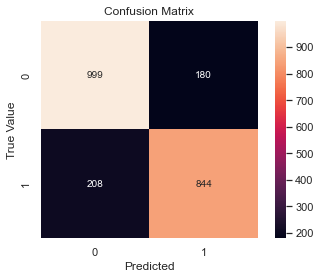

In [102]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
axes=sn.heatmap(cm,square =True, annot=True,fmt='d',cbar=True)
axes.set_xlabel('Predicted')
axes.set_ylabel('True Value')
axes.set_title('Confusion Matrix')
plt.show()

In [103]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1179
           1       0.82      0.80      0.81      1052

    accuracy                           0.83      2231
   macro avg       0.83      0.82      0.83      2231
weighted avg       0.83      0.83      0.83      2231



In [89]:
# predict probabilities
model_LR.predict_proba(X_test)

array([[0.84504125, 0.15495875],
       [0.98296694, 0.01703306],
       [0.97053394, 0.02946606],
       ...,
       [0.82421481, 0.17578519],
       [0.98410897, 0.01589103],
       [0.00416741, 0.99583259]])

In [90]:
model_LR.predict_proba(X_test)[:,1]

array([0.15495875, 0.01703306, 0.02946606, ..., 0.17578519, 0.01589103,
       0.99583259])

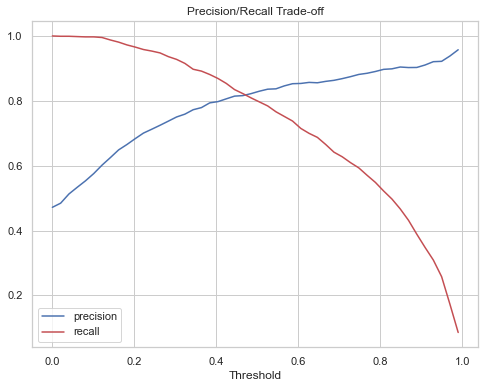

In [91]:
precision_value = []
recall_value = []
model_RF = LogisticRegression(random_state=42, max_iter=1000)
model_RF.fit(X_train,y_train)              # use LogisticRegression algorithm 

for i in np.linspace(0,0.99,50):       # calculate the precision and recall value with different threshold
    probas = model_RF.predict_proba(X_test)[:,1:]
    predictions = np.where(probas >= i,1,0)   
    errors = predictions-y_test.to_numpy().reshape(-1,1)    
    fp = np.count_nonzero(errors == 1)
    fn = np.count_nonzero(errors == -1)
    tp = np.sum(np.where(np.logical_and(errors == 0, predictions == 1),1,0))
    tn = np.sum(np.where(np.logical_and(errors == 0, predictions == 0),1,0))
    precision = tp / np.sum(tp + fp)
    precision_value.append(precision)
    recall = tp / np.sum(tp + fn)
    recall_value.append(recall)
    
plt.figure(figsize=(8,6))   # plot the trade off diagramm
plt.title("Precision/Recall Trade-off")    
plt.plot(np.linspace(0,0.99,50), precision_value ,label="precision",c="b")
plt.plot(np.linspace(0,0.99,50), recall_value,label="recall",c="r")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [111]:
y_score=model_LR.predict_proba(X_test)[:,1]

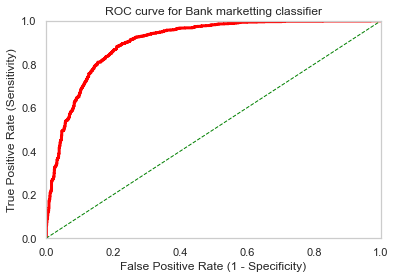

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test,model_LR.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Bank marketting classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=3)
plt.plot([0,1],[0,1],color='green',lw=1,linestyle='--')

plt.grid()
plt.show()

In [112]:
roc_auc_score(y_test, y_score)

0.9032530629488804

In [113]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

NameError: name 'precisions' is not defined

## Feature importance

Feature ranking:
1. feature 3 (0.542375)
2. feature 36 (0.138618)
3. feature 23 (0.115625)
4. feature 38 (0.057817)
5. feature 30 (0.037941)
6. feature 1 (0.035189)
7. feature 0 (0.016755)
8. feature 24 (0.012046)
9. feature 31 (0.009219)
10. feature 28 (0.007875)
11. feature 37 (0.006794)
12. feature 5 (0.005464)
13. feature 2 (0.005219)
14. feature 20 (0.003207)
15. feature 18 (0.002129)
16. feature 4 (0.001810)
17. feature 17 (0.001336)
18. feature 19 (0.000580)
19. feature 21 (0.000000)
20. feature 22 (0.000000)
21. feature 35 (0.000000)
22. feature 34 (0.000000)
23. feature 33 (0.000000)
24. feature 32 (0.000000)
25. feature 29 (0.000000)
26. feature 6 (0.000000)
27. feature 7 (0.000000)
28. feature 8 (0.000000)
29. feature 9 (0.000000)
30. feature 10 (0.000000)
31. feature 11 (0.000000)
32. feature 12 (0.000000)
33. feature 13 (0.000000)
34. feature 14 (0.000000)
35. feature 15 (0.000000)
36. feature 16 (0.000000)
37. feature 27 (0.000000)
38. feature 26 (0.000000)
39. feature 25

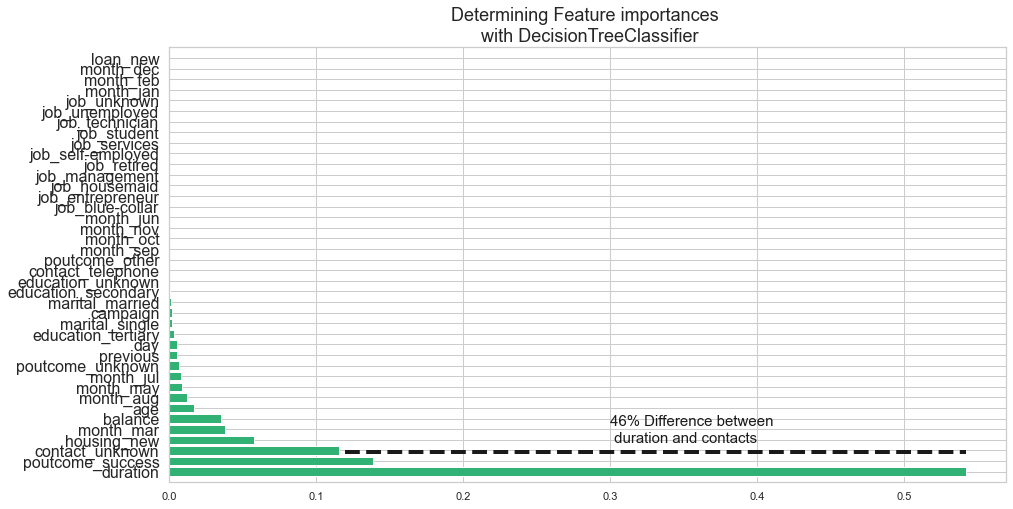

In [96]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = df4.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(15,8))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=16)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=4, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()